In [129]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [130]:
file=pd.read_excel("Merged files_2x.xlsx",header=0)

In [143]:
X=file.loc[:,["Datum i vrijeme",#'Kalorimetar 1 39024788Tren.protok (m3/h) (t-1)','Kalorimetar 1 39024788Temp.pov.voda (°C) (t-1)',
       'Sat', #'Dan u sedmici',
       #'Mjesec', 'Godina', 'Kvartal', 'Dan u godini', 'Dan u mjesecu',#'Temp.senzor un.6 24007412Temperatura (°C) (t-1)',
        'Temp.senzor un.4 24004658Temperatura (°C) (t-1)',"Praznik","Radni sati"]]

#'Kalorimetar 1 39024788Temp.pol.voda (°C)',
       #'Kalorimetar 1 39024788Temp.pov.voda (°C)', 
        #'Temp.senzor vanj.1 25000099Temperatura (°C)',
       #'Temp.senzor vanj.1 25000099Vlažnost (%)', 
        #'Grijanje_K1','Broj sati grijanja_K1','Negrijano',   #'Sedmica',

In [144]:
X.set_index(file["Datum i vrijeme"]).head(2)

,Datum i vrijeme,Sat,Temp.senzor un.4 24004658Temperatura (°C) (t-1),Praznik,Radni sati
Datum i vrijeme,,,,,
2015-10-01 00:00:00,2015-10-01 00:00:00,0,NaN,0.0,0.0
2015-10-01 01:00:00,2015-10-01 01:00:00,1,21.11,0.0,0.0


In [145]:
#X["Negrijano"]=X["Negrijano"].fillna(0)

In [146]:
Y=file.loc[:, ['Temp.senzor un.4 24004658Temperatura (°C)']]

In [147]:
feat_and_lab=pd.concat([X,Y],axis=1)

In [148]:
feat_and_lab.head(2)

,Datum i vrijeme,Sat,Temp.senzor un.4 24004658Temperatura (°C) (t-1),Praznik,Radni sati,Temp.senzor un.4 24004658Temperatura (°C)
0,2015-10-01 00:00:00,0,NaN,0.0,0.0,21.11
1,2015-10-01 01:00:00,1,21.11,0.0,0.0,21.06


In [149]:
feat_and_lab.isna().sum()

Datum i vrijeme                                     0
Sat                                                 0
Temp.senzor un.4 24004658Temperatura (°C) (t-1)    30
Praznik                                            30
Radni sati                                         30
Temp.senzor un.4 24004658Temperatura (°C)          27
dtype: int64

In [150]:
feat_and_lab = feat_and_lab.dropna(subset=[#'Temp.senzor un.6 24007412Temperatura (°C) (t-1)',
       'Temp.senzor un.4 24004658Temperatura (°C) (t-1)',
       'Praznik',
       'Radni sati',
       'Temp.senzor un.4 24004658Temperatura (°C)',], how='any')

In [151]:
feat_and_lab.columns

Index(['Datum i vrijeme', 'Sat',
       'Temp.senzor un.4 24004658Temperatura (°C) (t-1)', 'Praznik',
       'Radni sati', 'Temp.senzor un.4 24004658Temperatura (°C)'],
      dtype='object')

In [153]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X =feat_and_lab[list(feat_and_lab.columns[1:5])]


vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
1,5.238164,Temp.senzor un.4 24004658Temperatura (°C) (t-1)
0,4.080910,Sat
3,1.666694,Radni sati
2,1.020920,Praznik


In [154]:
#feat_and_lab=feat_and_lab.interpolate(method ="bfill")

In [162]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  ["Temp.senzor un.4 24004658Temperatura (°C) (t-1)"]

for column in core_columns:
    decomp = seasonal_decompose(feat_and_lab[column], period=24, model='additive', extrapolate_trend='freq')
    feat_and_lab[f"{column}_trend"] = decomp.trend
    feat_and_lab[f"{column}_seasonal"] = decomp.seasonal

In [163]:
fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(16,8))

#for i, column in enumerate(core_columns):
    
    #res = seasonal_decompose(feat_and_lab[column], freq=24, model='additive', extrapolate_trend='freq')

   # ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
   # res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
 #   ax[0,i].set_ylabel('Observed', fontsize=14)

  #  res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
#    ax[1,i].set_ylabel('Trend', fontsize=14)

    #res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    #ax[2,i].set_ylabel('Seasonal', fontsize=14)
    
   # res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
   # ax[3,i].set_ylabel('Residual', fontsize=14)

#plt.show()

#XGB

In [164]:
split_date = '10/01/2017  00:00:00 AM'
feat_train = feat_and_lab.loc[feat_and_lab["Datum i vrijeme"] <= split_date].copy()
feat_test = feat_and_lab.loc[feat_and_lab["Datum i vrijeme"]> split_date].copy()

In [165]:
len(feat_train.columns)

8

In [166]:
feat_train.columns

Index(['Datum i vrijeme', 'Sat',
       'Temp.senzor un.4 24004658Temperatura (°C) (t-1)', 'Praznik',
       'Radni sati', 'Temp.senzor un.4 24004658Temperatura (°C)',
       'Temp.senzor un.4 24004658Temperatura (°C) (t-1)_trend',
       'Temp.senzor un.4 24004658Temperatura (°C) (t-1)_seasonal'],
      dtype='object')

In [167]:
import xgboost as xgb
from xgboost import plot_importance

In [168]:
reg = xgb.XGBRegressor(n_estimators=10000)
reg.fit(feat_train.iloc[:,1:5], feat_train.iloc[:,5],
        eval_set=[(feat_train.iloc[:,1:5], feat_train.iloc[:,5]), (feat_test.iloc[:,1:5], feat_test.iloc[:,5])],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

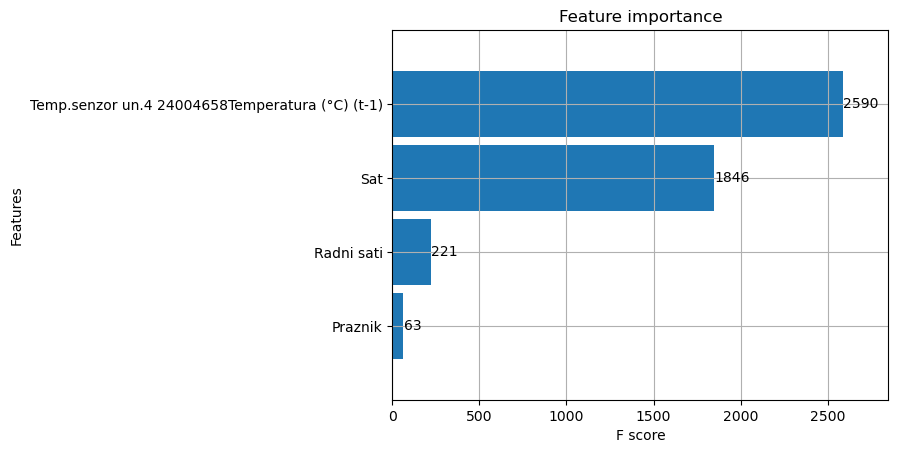

In [170]:
plot_importance(reg, height=0.9)
plt.show()

In [171]:
feat_test.columns

Index(['Datum i vrijeme', 'Sat',
       'Temp.senzor un.4 24004658Temperatura (°C) (t-1)', 'Praznik',
       'Radni sati', 'Temp.senzor un.4 24004658Temperatura (°C)',
       'Temp.senzor un.4 24004658Temperatura (°C) (t-1)_trend',
       'Temp.senzor un.4 24004658Temperatura (°C) (t-1)_seasonal'],
      dtype='object')

In [173]:
feat_test['Prediction'] = reg.predict(feat_test.iloc[:,1:5])

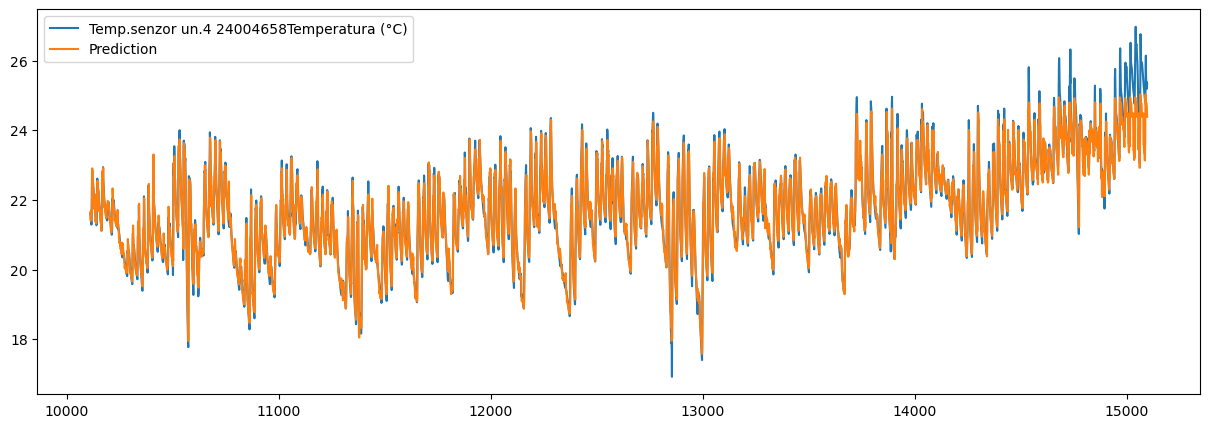

In [174]:
feat_test[['Temp.senzor un.4 24004658Temperatura (°C)','Prediction']].plot(figsize=(15, 5))
plt.show()

In [176]:
feat_test['error'] =feat_test['Temp.senzor un.4 24004658Temperatura (°C)'] - feat_test['Prediction']
feat_test['abs_error'] = feat_test['error'].apply(np.abs)
#error_by_day = feat_test.groupby(['Godina','Mjesec','Dan u mjesecu']) \
  #  .mean()[['Temp.senzor un.4 24004658Temperatura (°C)','Prediction','error','abs_error']]

In [177]:
error_by_day.sort_values('error', ascending=True).head(10)

Temp.senzor un.4 24004658Temperatura (°C)  \
Godina Mjesec Dan u mjesecu                                              
2017   10     30                                             19.753750   
              20                                             20.840000   
2018   3      21                                             21.553333   
       2      18                                             21.002083   
2017   11     22                                             19.597083   
              21                                             20.451667   
2018   3      20                                             21.710000   
       1      21                                             21.152917   
       2      4                                              21.173333   
       1      28                                             19.090417   

                             Prediction     error  abs_error  
Godina Mjesec Dan u mjesecu                                   
2017   10     30              19.842978 -0.089228   0.177364  
              20              20.921913 -0.081913   0.367928  
2018   3      21              21.619781 -0.066449   0.137140  
       2      18              21.057396 -0.055313   0.104709  
2017   11     22              19.652132 -0.055049   0.270491  
              21              20.505960 -0.054295   0.252696  
2018   3      20              21.762590 -0.052590   0.120135  
       1      21              21.202925 -0.050008   0.132300  
       2      4               21.220421 -0.047087   0.118929  
       1      28              19.134537 -0.044120   0.103786

In [178]:
error_by_day.sort_values('abs_error', ascending=True).head(10)

Temp.senzor un.4 24004658Temperatura (°C)  \
Godina Mjesec Dan u mjesecu                                              
2017   11     26                                             19.983333   
              12                                             20.853333   
       10     29                                             20.281667   
       11     5                                              19.843750   
       10     14                                             20.917500   
              8                                              20.192083   
       11     4                                              20.547083   
       10     7                                              20.397500   
       11     11                                             21.589583   
              19                                             19.424583   

                             Prediction     error  abs_error  
Godina Mjesec Dan u mjesecu                                   
2017   11     26              19.959885  0.023448   0.057246  
              12              20.820608  0.032726   0.070321  
       10     29              20.269552  0.012115   0.075005  
       11     5               19.820360  0.023391   0.079487  
       10     14              20.869219  0.048282   0.080843  
              8               20.163641  0.028442   0.081390  
       11     4               20.525337  0.021746   0.081441  
       10     7               20.363840  0.033659   0.081628  
       11     11              21.548595  0.040989   0.082584  
              19              19.409576  0.015006   0.082978

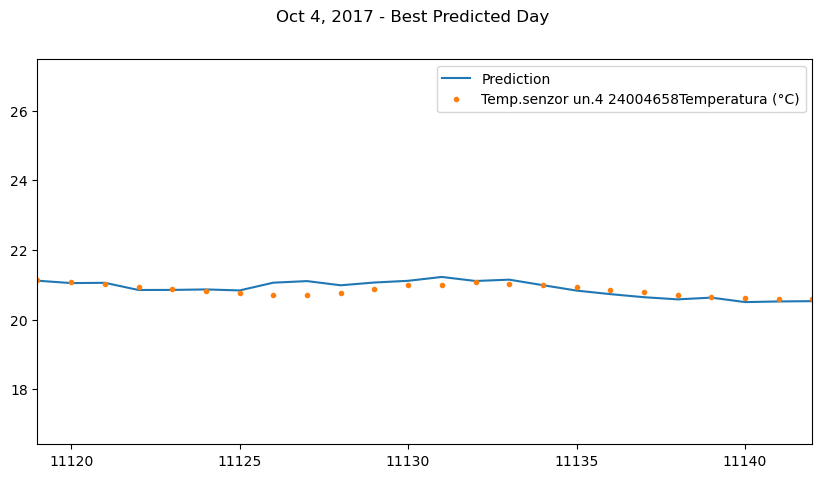

In [179]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(10)
_ =feat_test[['Prediction','Temp.senzor un.4 24004658Temperatura (°C)']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower=feat_test[feat_test["Datum i vrijeme"]=='11/12/2017  00:00:00 AM'].index.values, upper=feat_test[feat_test["Datum i vrijeme"]=='11/12/2017  11:00:00 PM'].index.values)
plot = plt.suptitle('Oct 4, 2017 - Best Predicted Day')
plt.show()

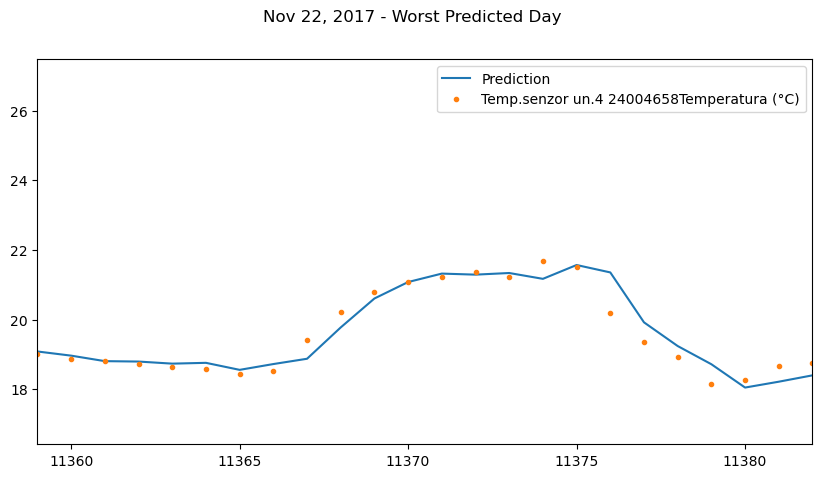

In [180]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(10)
_ =feat_test[['Prediction','Temp.senzor un.4 24004658Temperatura (°C)']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower=feat_test[feat_test["Datum i vrijeme"]=='11/22/2017  00:00:00 AM'].index.values, upper=feat_test[feat_test["Datum i vrijeme"]=='11/22/2017  11:00:00 PM'].index.values)
plot = plt.suptitle('Nov 22, 2017 - Worst Predicted Day')
plt.show()

In [181]:
# Calcuate metrics


score_mae = mean_absolute_error(feat_test['Temp.senzor un.4 24004658Temperatura (°C)'], feat_test['Prediction'])
score_rmse = math.sqrt(mean_absolute_error(feat_test['Temp.senzor un.4 24004658Temperatura (°C)'], feat_test['Prediction']))

print('RMSE: {}'.format(score_rmse))

RMSE: 0.4346509203338469


In [182]:
#for col in feat_and_lab.columns:
    #feat_and_lab[col] = feat_and_lab[col].interpolate(method="bfill")

In [183]:
#feat_and_lab.columns

In [184]:
#columns1=feat_and_lab.columns
#downsample=feat_and_lab[columns1].resample("1D", on="Datum i vrijeme").mean()

#feat_and_lab_1= downsample.copy()

In [185]:
feat_and_lab.isna().sum()

Datum i vrijeme                                             0
Sat                                                         0
Temp.senzor un.4 24004658Temperatura (°C) (t-1)             0
Praznik                                                     0
Radni sati                                                  0
Temp.senzor un.4 24004658Temperatura (°C)                   0
Temp.senzor un.4 24004658Temperatura (°C) (t-1)_trend       0
Temp.senzor un.4 24004658Temperatura (°C) (t-1)_seasonal    0
dtype: int64

In [52]:


#feat_and_lab ['Sezona'] = feat_and_lab['Mjesec'] % 12 // 3 + 1


In [186]:
from statsmodels.tsa.arima_model import ARIMA
#aa=feat_and_lab.index.values
aa=feat_and_lab.index

In [187]:
feat_and_lab.columns

Index(['Datum i vrijeme', 'Sat',
       'Temp.senzor un.4 24004658Temperatura (°C) (t-1)', 'Praznik',
       'Radni sati', 'Temp.senzor un.4 24004658Temperatura (°C)',
       'Temp.senzor un.4 24004658Temperatura (°C) (t-1)_trend',
       'Temp.senzor un.4 24004658Temperatura (°C) (t-1)_seasonal'],
      dtype='object')

In [190]:
#univariate_df["Datum i vrijeme"]=aa
univariate_df=pd.DataFrame()
univariate_df[ 'Datum i vrijeme']=feat_and_lab[ 'Datum i vrijeme'].values
#univariate_df["Temp.senzor vanj.1 25000099Temperatura (°C)"]=feat_and_lab_1["Temp.senzor vanj.1 25000099Temperatura (°C)"].values
#univariate_df['Temp.senzor un.6 (t-1)']=feat_and_lab['Temp.senzor un.6 24007412Temperatura (°C) (t-1)'].values
univariate_df['Temp.senzor un.4(t-1)']=feat_and_lab['Temp.senzor un.4 24004658Temperatura (°C) (t-1)'].values
univariate_df[ 'Sat']=feat_and_lab[ 'Sat'].values
#univariate_df[ 'Dan u sedmici']=feat_and_lab[ 'Dan u sedmici'].values
#univariate_df[  'Mjesec']=feat_and_lab[ 'Mjesec'].values
#univariate_df[ 'Godina']=feat_and_lab[ 'Godina'].values
#Univariate_df[ 'Kvartal']=feat_and_lab[ 'Kvartal'].values
#univariate_df[ 'Dan u godini']=feat_and_lab['Dan u godini'].values
#univariate_df[ 'Dan u mjesecu']=feat_and_lab[ 'Dan u mjesecu'].values
univariate_df[ 'Praznik']=feat_and_lab[ 'Praznik'].values
univariate_df['Radni sati']=feat_and_lab[ 'Radni sati'].values
univariate_df["Temp "]=feat_and_lab['Temp.senzor un.4 24004658Temperatura (°C)'].values



#univariate_df["Plin, m3"]=feat_and_lab_1["Plin, m3"].values

In [191]:
univariate_df.corr()

,Temp.senzor un.4(t-1),Sat,Praznik,Radni sati,Temp
Temp.senzor un.4(t-1),1.000000,0.219479,-0.087665,0.003719,0.979179
Sat,0.219479,1.000000,0.000265,-0.196050,0.185654
Praznik,-0.087665,0.000265,1.000000,-0.000062,-0.088965
Radni sati,0.003719,-0.196050,-0.000062,1.000000,0.085081
Temp,0.979179,0.185654,-0.088965,0.085081,1.000000


In [192]:
len(univariate_df.columns)


6

In [193]:
train_size = int(0.85 * len(feat_and_lab))
test_size = len(feat_and_lab) - train_size


train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame((univariate_df.iloc[:train_size, :5])),  pd.DataFrame((univariate_df.iloc[:train_size,5]))
x_valid, y_valid = pd.DataFrame((univariate_df.iloc[train_size:,:5])), pd.DataFrame((univariate_df.iloc[train_size:, 5]))

print(len(train), len(x_valid))

12804 2260


In [194]:
y_valid

,Temp
12804,23.37
12805,22.94
12806,22.99
12807,22.66
12808,21.48
...,...
15059,25.33
15060,25.18
15061,25.36
15062,25.38


In [195]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [196]:
y_train

,Temp
0,21.06
1,21.04
2,21.01
3,20.98
4,20.94
...,...
12799,21.76
12800,22.16
12801,22.60
12802,22.84


In [197]:
y_train.isna().sum()

Temp     0
dtype: int64

In [198]:
y_train.interpolate()

,Temp
0,21.06
1,21.04
2,21.01
3,20.98
4,20.94
...,...
12799,21.76
12800,22.16
12801,22.60
12802,22.84


In [200]:
# Fit model
model = ARIMA(y_train.interpolate(), order=(2,0,1))
model_fit = model.fit()

# Prediction with ARIMA
y_pred, se, conf = model_fit.forecast(2260)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))

print('RMSE: {}'.format(score_rmse))

RMSE: 2.1662073085433136


In [201]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(y_train.interpolate(), start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4900.666, Time=0.84 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=114127.760, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.33 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=1.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4313.949, Time=0.91 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.36 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=4308.919, Time=1.98 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=2.53 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=6.65 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=4303.476, Time=1.32 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=4446.394, Time=0.79 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=4300.089, Time=2.48 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=4303.523, Time=1.13 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=4308.175, Time=9.55 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=3848.341, Time

C:\Users\Ehlimana\anaconda3\envs\Ehlimana\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


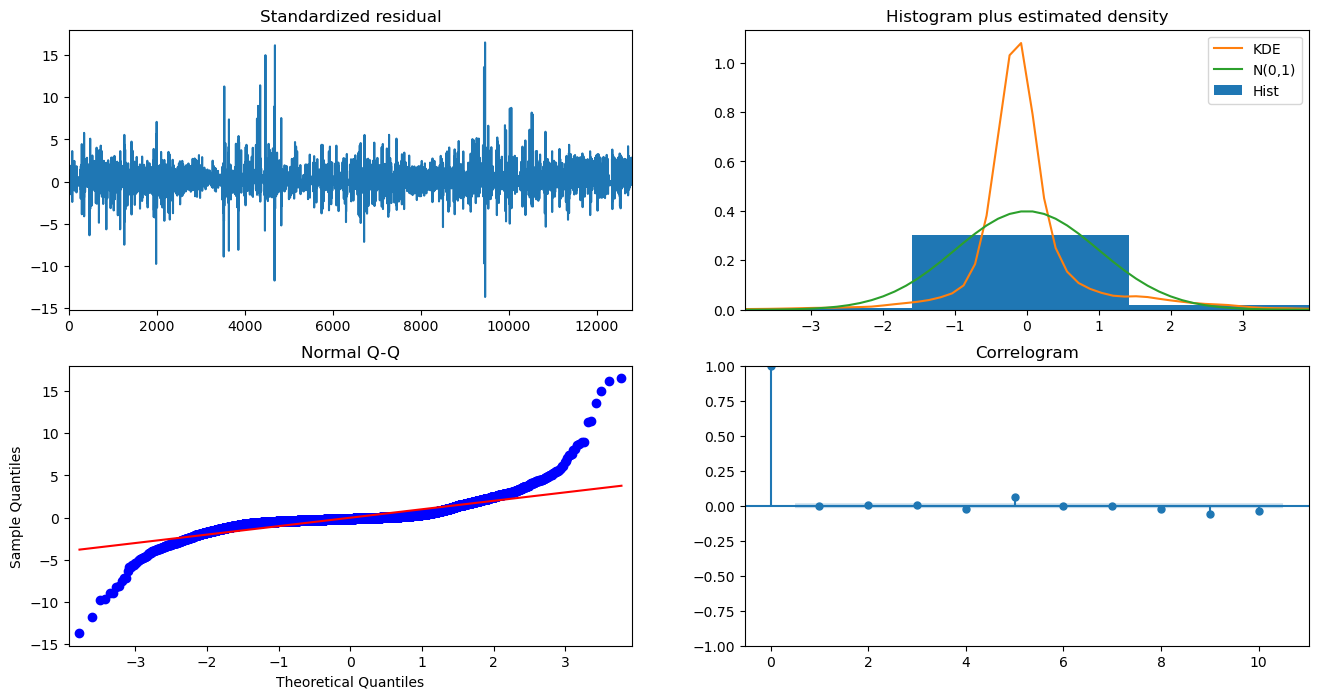

In [202]:
model.plot_diagnostics(figsize=(16,8))
plt.show()


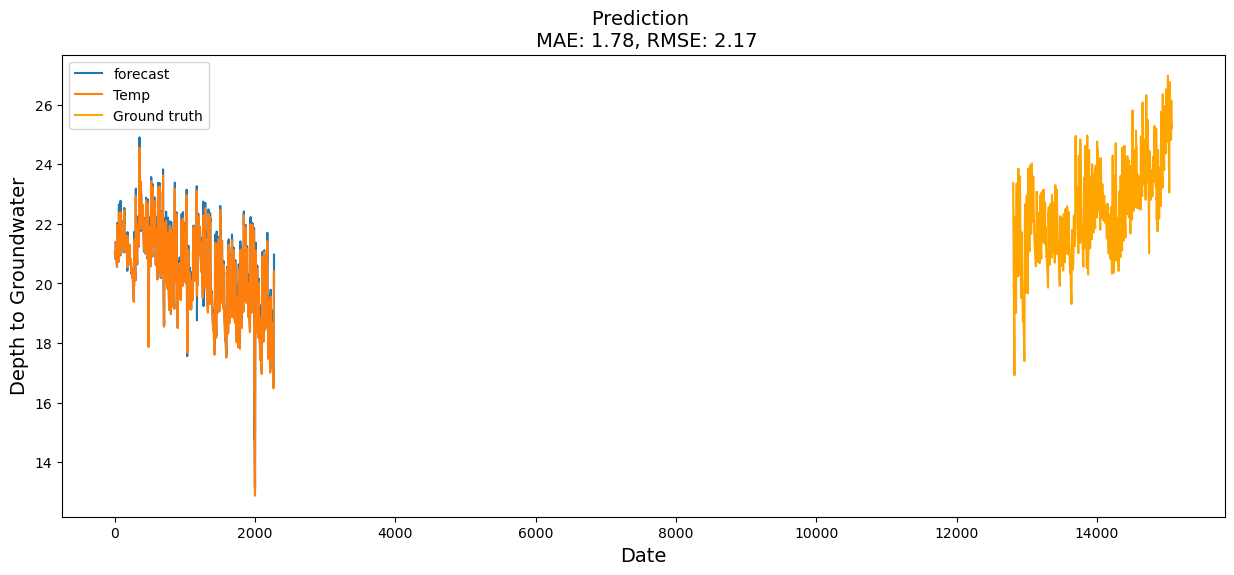

In [203]:
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model_fit.plot_predict(1, 2270, ax=ax)
sns.lineplot(x=x_valid.index, y=y_valid['Temp '], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

In [83]:
#univariate_df["Datum i vrijeme"]=aa
univariate_df=pd.DataFrame()
#univariate_df["Temp.senzor vanj.1 25000099Temperatura (°C)"]=feat_and_lab_1["Temp.senzor vanj.1 25000099Temperatura (°C)"].values
#univariate_df['T pol (t-1)']=feat_and_lab['T pol (t-1)'].values
#univariate_df['T pov (t-1)']=feat_and_lab['T pov (t-1)'].values
#univariate_df['T vanj(t-1)']=feat_and_lab['T vanj(t-1)'].values
#univariate_df['T prost (t-1)']=feat_and_lab['T prost (t-1)'].values
#univariate_df['Grijanje_K1']=feat_and_lab['Grijanje_K1'].values
#univariate_df[ 'Broj sati grijanja']=feat_and_lab[ 'Broj sati grijanja_K1'].values
#univariate_df[ 'Negrijano']=feat_and_lab[ 'Negrijano'].values
#univariate_df[ 'Sat']=feat_and_lab[ 'Sat'].values
#univariate_df[ 'Dan u sedmici']=feat_and_lab[ 'Dan u sedmici'].values
#univariate_df[  'Mjesec']=feat_and_lab[ 'Mjesec'].values
#univariate_df[ 'Godina']=feat_and_lab[ 'Godina'].values
#univariate_df[ 'Kvartal']=feat_and_lab[ 'Kvartal'].values
#univariate_df[ 'Dan u godini']=feat_and_lab['Dan u godini'].values
#univariate_df[ 'Dan u mjesecu']=feat_and_lab[ 'Dan u mjesecu'].values
#univariate_df[ 'Datum i vrijeme']=feat_and_lab[ 'Datum i vrijeme'].values

#univariate_df["Temp "]=feat_and_lab['Temp.senzor un.4 24004658Temperatura (°C)'].values



#univariate_df["Plin, m3"]=feat_and_lab_1["Plin, m3"].values

In [204]:
univariate_df

,Datum i vrijeme,Temp.senzor un.4(t-1),Sat,Praznik,Radni sati,Temp
0,2015-10-01 01:00:00,21.11,1,0.0,0.0,21.06
1,2015-10-01 02:00:00,21.06,2,0.0,0.0,21.04
2,2015-10-01 03:00:00,21.04,3,0.0,0.0,21.01
3,2015-10-01 04:00:00,21.01,4,0.0,0.0,20.98
4,2015-10-01 05:00:00,20.98,5,0.0,0.0,20.94
...,...,...,...,...,...,...
15059,2018-04-27 13:00:00,25.56,13,0.0,0.0,25.33
15060,2018-04-27 14:00:00,25.33,14,0.0,0.0,25.18
15061,2018-04-27 15:00:00,25.18,15,0.0,0.0,25.36
15062,2018-04-27 16:00:00,25.36,16,0.0,0.0,25.38


In [205]:
univariate_df.columns

Index(['Datum i vrijeme', 'Temp.senzor un.4(t-1)', 'Sat', 'Praznik',
       'Radni sati', 'Temp '],
      dtype='object')

In [206]:
feature_columns = [#'Temp.senzor un.6 (t-1)', 
    'Temp.senzor un.4(t-1)', 'Sat',
       #'Dan u sedmici', 'Mjesec', 'Godina', 'Kvartal', 'Dan u godini',
       #'Dan u mjesecu',
    "Datum i vrijeme" ,'Praznik', 'Radni sati', ]
target_column = ['Temp ']


In [210]:

train_size = int(0.85 * len(univariate_df))

multivariate_df = univariate_df[['Datum i vrijeme','Temp ',#'Temp.senzor un.6 (t-1)',
                                 'Temp.senzor un.4(t-1)',
 'Sat',
 #'Dan u sedmici', 'Mjesec', 'Godina', 'Kvartal', 'Dan u godini',
       #'Dan u mjesecu',
                                 "Praznik", 'Radni sati']].copy()
multivariate_df.columns = ['ds', 'y',#'Temp.senzor un.6 (t-1)',
                           'Temp.senzor un.4(t-1)',
 'Sat',
                           #'Dan u sedmici', 'Mjesec', 'Godina', 'Kvartal', 'Dan u godini',
     #  'Dan u mjesecu',
                           "Praznik", 'Radni sati']

train = multivariate_df.iloc[:train_size, :]
train.interpolate("bfill")
x_train, y_train = pd.DataFrame(multivariate_df.iloc[:train_size, [0,2,3,4,5]]), pd.DataFrame(multivariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(multivariate_df.iloc[train_size:, [0,2,3,4,5]]), pd.DataFrame(multivariate_df.iloc[train_size:, 1])

train.head()


,ds,y,Temp.senzor un.4(t-1),Sat,Praznik,Radni sati
0,2015-10-01 01:00:00,21.06,21.11,1,0.0,0.0
1,2015-10-01 02:00:00,21.04,21.06,2,0.0,0.0
2,2015-10-01 03:00:00,21.01,21.04,3,0.0,0.0
3,2015-10-01 04:00:00,20.98,21.01,4,0.0,0.0
4,2015-10-01 05:00:00,20.94,20.98,5,0.0,0.0


In [212]:
# Train the model


from fbprophet import Prophet


# Train the model
model = Prophet()

#model.add_regressor('Temp.senzor un.6 (t-1)')
model.add_regressor('Temp.senzor un.4(t-1)')
model.add_regressor('Sat')
#model.add_regressor('Dan u sedmici')
#model.add_regressor('Mjesec')
#model.add_regressor('Godina')
#model.add_regressor('Kvartal')
#model.add_regressor('Dan u godini')
#model.add_regressor('Dan u mjesecu')

model.add_regressor("Praznik")
model.add_regressor('Radni sati') 

# Fit the model with train set
model.fit(train)

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred['yhat']))

print('RMSE: {}'.format(score_rmse))

RMSE: 0.2675702926926881


In [82]:
from datetime import date
d0 = date(2015, 10, 15)
d1 = date(2016, 4, 15)
delta = d1 - d0
print(delta.days)

183


In [83]:
from sklearn.preprocessing import MinMaxScaler

data = univariate_df.filter(["Temp "])
#Convert the dataframe to a numpy array
dataset = data.values

In [84]:
dataset[1,:]

array([21.06])

In [85]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.29726715],
       [0.29168991],
       [0.28945901],
       ...,
       [0.84160625],
       [0.83045176],
       [0.82375906]])

In [86]:
x_train.shape

(12857, 12)

In [87]:
x_test=x_valid

In [88]:
x_test.shape

(2270, 12)

In [ ]:
# reshape input to be [samples, time steps, features]

x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, 0))

print(len(x_train), len(x_test))

In [138]:
x_train.shape

(12857, 1, 1)

In [228]:
y_test.shape

(2270,)

In [230]:
x_train=np.reshape(x_train,(x_train.shape[0],1,x_train.shape[1]))

In [233]:
x_test=np.reshape(x_test,(x_test.shape[0],1,x_test.shape[1]))

ValueError: Must pass 2-d input. shape=(2270, 1, 15)

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[0], x_train.shape[1])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5, validation_data=(x_test, y_valid))

model.summary()

In [ ]:
# Lets predict with the model
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

# invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])

test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Get the root mean squared error (RMSE) and MAE
score_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
score_mae = mean_absolute_error(y_test[0], test_predict[:,0])
print('RMSE: {}'.format(score_rmse))